## predicting heart-disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem defnition

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Data 

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

<img src='images/dataDict.png'>

## Preparing the tools 

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [38]:
#Import all the tools needed
# Regular EDA ( exploratory data analasis ) and plotting library 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report , ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data


In [2]:
df = pd.read_csv("Data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data exploration (explonatory data analasis)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

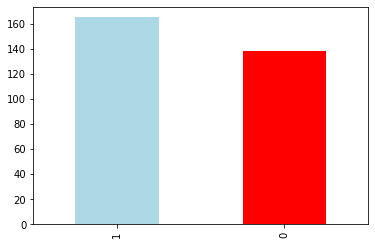

In [6]:
df["target"].value_counts().plot(kind='bar', color=['lightblue','red'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease Frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


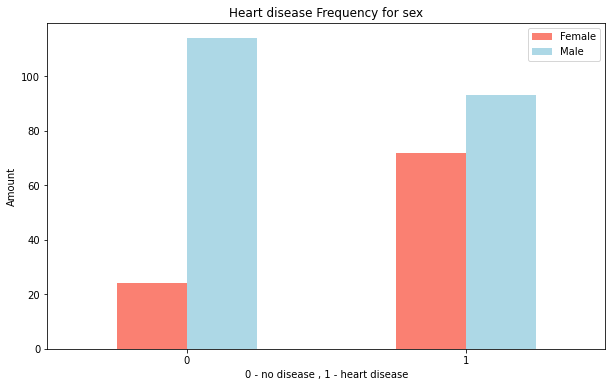

In [12]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize = (10,6),
                                  color= ['salmon','lightblue'])

plt.title('Heart disease Frequency for sex')
plt.xlabel("0 - no disease , 1 - heart disease")
plt.ylabel('Amount')
plt.legend(['Female','Male']);
plt.xticks(rotation = 0); #rotate xlable

### Age vs Heart disease for Heart disease

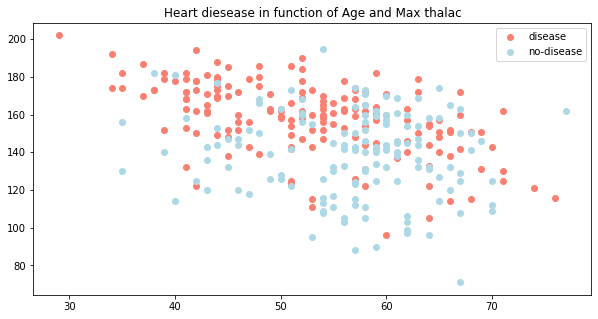

In [13]:
#create another figure
plt.figure(figsize=(10,5))

#scatter with positive examples
plt.scatter(df['age'][df.target==1],
            df['thalach'][df.target==1],
            c = 'salmon');

#scatter with positive examples
plt.scatter(df['age'][df.target==0],
            df['thalach'][df.target==0],
            c = 'lightblue');

#add some helpful info 
plt.title('Heart diesease in function of Age and Max thalac')
plt.legend(['disease','no-disease']);

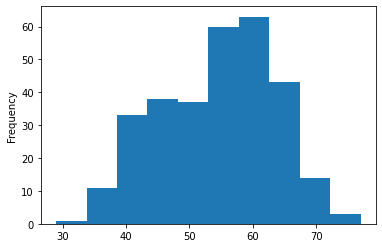

In [14]:
df.age.plot.hist();

### Heart disease according to chest pain

1. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


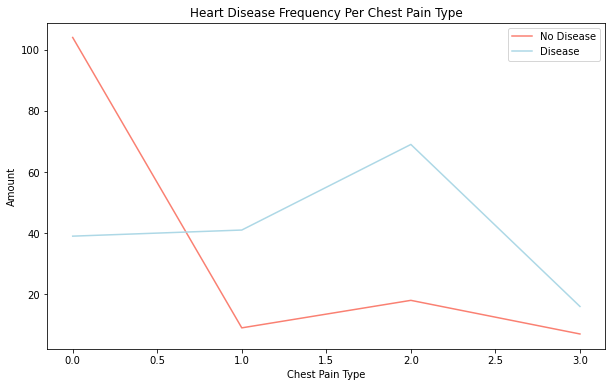

In [16]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [17]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


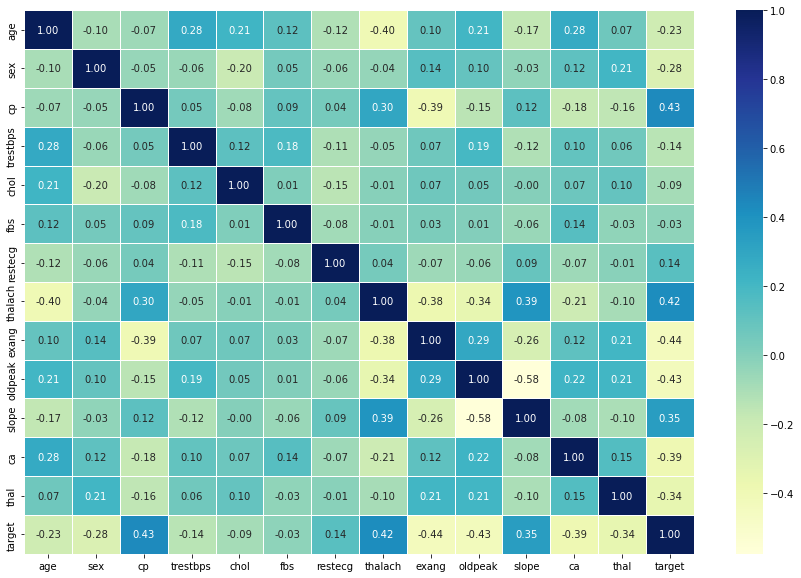

In [18]:
#lets make our correlation matrics a little prettier
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize= (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu'
                )

## Modeling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#split data into x and y 
X = df.drop('target',axis = 1)
y = df.target

In [21]:
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [22]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    model_scores = {}
    for model_name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[model_name] = model.score(X_test,y_test)
    return model_scores


In [23]:
fit_and_score(models, X_train, X_test, y_train, y_test)

C:\Users\Avita\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.7213114754098361}

C:\Users\Avita\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


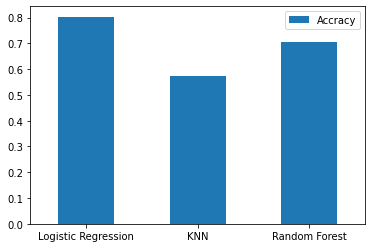

In [24]:
#to plot a dictionary convert it into dataFrame first
model_compare = pd.DataFrame(fit_and_score(models, X_train, X_test, y_train, y_test),index=['Accracy'])
model_compare.T.plot(kind='bar');
plt.xticks(rotation=0);

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [25]:
#lets tune KNN classifier model

KNN_classifier = KNeighborsClassifier()
KNN_scores = {}

train_scores  = []
test_scores = []

neighbour = range(1,21)

for i in range(1,21):
    KNN_classifier.set_params(n_neighbors=i)
    KNN_classifier.fit(X_train,y_train)
    KNN_scores[i] = KNN_classifier.score(X_test,y_test)
    train_scores.append(KNN_classifier.score(X_train,y_train))
    test_scores.append(KNN_classifier.score(X_test,y_test))

# KNN_scores
tuple_list = [(value,key) for key, value in KNN_scores.items()]
print(f"max score at i ={max(tuple_list)[1]} and score={max(tuple_list)[0]}")

max score at i =11 and score=0.6229508196721312


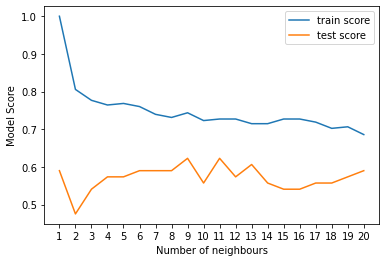

In [26]:
#plot Kneghbour train and test scores
# train_scores
plt.plot(neighbour,train_scores,label='train score');
plt.plot(neighbour,test_scores,label='test score');
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbours');
plt.ylabel('Model Score');
plt.legend();

## HyperParamter tuning with Randomized searchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [27]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [28]:
#Tune logistic regression model

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv =5,
                                verbose=True,
                                n_jobs=-1,
                                n_iter=20
                           )

#fit the best model
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [30]:
rs_log_reg.score(X_test,y_test)

0.8032786885245902

In [31]:
#Tune random ForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          n_jobs=-1,
                          )

#fit the best RandomForestClassifier Model
rs_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [32]:
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 10,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [33]:
rs_rf.score(X_test,y_test)

0.7704918032786885

## Hyper Parameter tuning with gridSearchCV

In [34]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [35]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [36]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8032786885245902

## Evaluating our tuned machine learning classifier
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [45]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

C:\Users\Avita\Desktop\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


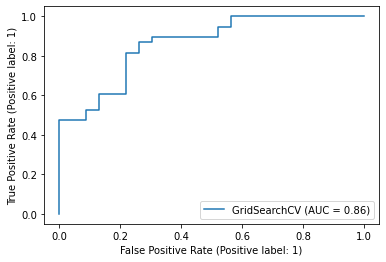

In [48]:
# # Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

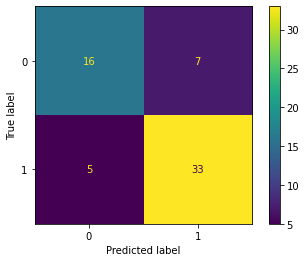

In [49]:
def plot_confusion_mat(y_test,y_preds):
    ConfusionMatrixDisplay.from_predictions(y_test,y_preds)
    
y_preds = gs_log_reg.predict(X_test)
plot_confusion_mat(y_test,y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [50]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        23
           1       0.82      0.87      0.85        38

    accuracy                           0.80        61
   macro avg       0.79      0.78      0.79        61
weighted avg       0.80      0.80      0.80        61



### Calculate evaluation matrix using crossvalidation

In [52]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [53]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [94]:
#cross validation scores
classification_scores = {}
for i in ['accuracy','precision','recall','f1']:
    classification_scores[i] = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring=i))
classification_scores

{'accuracy': 0.8446994535519124,
 'precision': 0.8207936507936507,
 'recall': 0.9212121212121213,
 'f1': 0.8673007976269721}

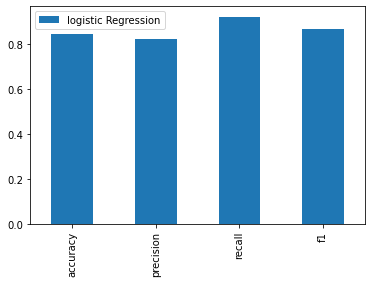

In [95]:
pd.DataFrame(classification_scores,index=['logistic Regression']).T.plot.bar();

### Feature importance 

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [89]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [97]:
#Check coeff_
clf.coef_

array([[ 0.01159235, -0.94995061,  0.60045721, -0.01449397, -0.00324474,
        -0.01647217,  0.33769442,  0.02984297, -0.53317422, -0.71089678,
         0.25740176, -0.65485855, -0.67287682]])

In [114]:
#match coeff's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.011592352151562749,
 'sex': -0.9499506082405854,
 'cp': 0.6004572115762158,
 'trestbps': -0.014493965578274755,
 'chol': -0.0032447398285973144,
 'fbs': -0.016472167530906502,
 'restecg': 0.33769442490564106,
 'thalach': 0.029842968678508504,
 'exang': -0.5331742167561204,
 'oldpeak': -0.7108967763614646,
 'slope': 0.2574017598455529,
 'ca': -0.6548585451966539,
 'thal': -0.6728768234887713}

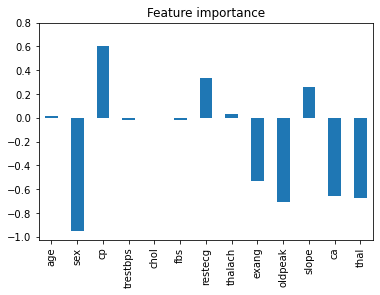

In [115]:
#visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=['relation'])
feature_df.T.plot.bar(title='Feature importance',legend=False);
plt.yticks(np.arange(-1,1,0.2));

slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Experimentation
If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?